# Capstone Webscrapping using BeautifulSoup

## Background

Exchange rates are defined as the price that one nation or economic zone’s currency can be exchanged for another currency. The rates are impacted by two factors:

1.The domestic currency value
2.The foreign currency value

Exchange rates are quoted between two currencies. For example – how many Indonesian Rupiah (IDR) can be exchanged for one U.S. dollar (USD). Movements in the exchange rate influence the decisions of individuals, businesses and the government. Collectively, this affects economic activity, inflation and the balance of payments. With that being said, it is clear that exchange rate is a very powerful information in business and economic environment.  

At this project, we will try to scrap the information regarding IDR - USD exchange rate from exchange-rates.org. We will try to scrap this sites for educational purpose only.  

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')



To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

The information that we need are the date and the exchange rate each day, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this.


From inspect element we know that we need to find the line table with class history-rates-data. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

In [4]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">
     May 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">
     2023-5-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="now


## Extracting the Information


Now all the beautiful soup part is over. All left to do is doing some programming to extract all the data automaticly, you can do this manualy at this part but if your data too long I advice you use loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since find_all will always return data in format list, we will use len() to check how long is our list.


In [5]:
row = table.find_all('a',attrs={'class':'w'})
row_length = len(row)
row_length

130

Okay, now we know the length of our data, now here what we will do for the looping process.

Here what the looping do to scrap the information:

First we need to establish a placeholder to receive the information that we scrap.
We named our placeholder temp and it's a list.
Then we will make a loop from one until the the length of the table row,
which we will find all cell of the column one and two which contain period and the inflation rate.
Then we will append it to our tuple that we prepared before,
every one iteration we will scrap one line of the table.

In [6]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get period
    date = table.find_all('a',attrs={'class':'w'})[i].text
    date = date.strip()
    #get exchange rate
    exchange_rate = table.find_all('span',attrs={'class':'w'})[i].text
    exchange_rate = exchange_rate.strip()
    temp.append((date,exchange_rate))
    
temp 

[('May 12, 2023', '$1 = Rp14,844'),
 ('May 11, 2023', '$1 = Rp14,776'),
 ('May 10, 2023', '$1 = Rp14,698'),
 ('May 9, 2023', '$1 = Rp14,776'),
 ('May 8, 2023', '$1 = Rp14,744'),
 ('May 5, 2023', '$1 = Rp14,675'),
 ('May 4, 2023', '$1 = Rp14,699'),
 ('May 3, 2023', '$1 = Rp14,680'),
 ('May 2, 2023', '$1 = Rp14,747'),
 ('May 1, 2023', '$1 = Rp14,677'),
 ('April 28, 2023', '$1 = Rp14,674'),
 ('April 27, 2023', '$1 = Rp14,691'),
 ('April 26, 2023', '$1 = Rp14,841'),
 ('April 25, 2023', '$1 = Rp14,940'),
 ('April 24, 2023', '$1 = Rp14,934'),
 ('April 21, 2023', '$1 = Rp14,936'),
 ('April 20, 2023', '$1 = Rp14,954'),
 ('April 19, 2023', '$1 = Rp14,995'),
 ('April 18, 2023', '$1 = Rp14,889'),
 ('April 17, 2023', '$1 = Rp14,850'),
 ('April 14, 2023', '$1 = Rp14,782'),
 ('April 13, 2023', '$1 = Rp14,722'),
 ('April 12, 2023', '$1 = Rp14,835'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns=('date','exchange_rate'))
df.head()

,date,exchange_rate
0,"May 12, 2023","$1 = Rp14,844"
1,"May 11, 2023","$1 = Rp14,776"
2,"May 10, 2023","$1 = Rp14,698"
3,"May 9, 2023","$1 = Rp14,776"
4,"May 8, 2023","$1 = Rp14,744"


As we can see, we already have the data that we need. Before we try to analyse it, we need to make sure that it has the right data types and format so that we can continue to the next process.

First, we have to check the data types!

In [8]:
df.dtypes


date             object
exchange_rate    object
dtype: object

We can see that 'date' is still an object. 

Now we have to change the 'date' type from object into datetime using .astype

In [9]:
df['date'] = df['date'].astype('datetime64[ns]')

In [10]:
df

,date,exchange_rate
0,2023-05-12,"$1 = Rp14,844"
1,2023-05-11,"$1 = Rp14,776"
2,2023-05-10,"$1 = Rp14,698"
3,2023-05-09,"$1 = Rp14,776"
4,2023-05-08,"$1 = Rp14,744"
...,...,...
125,2022-11-18,"$1 = Rp15,641"
126,2022-11-17,"$1 = Rp15,714"
127,2022-11-16,"$1 = Rp15,639"
128,2022-11-15,"$1 = Rp15,557"


After changing the 'date' type into datetime, next we should replace some of elements in exchange rate data so that it can operate as numeric only. We will remove '$1', '=', and ',' with .str.replace function.

In [11]:
df['exchange_rate'] = df['exchange_rate'].str.replace("$1"," ")

In [12]:
df

,date,exchange_rate
0,2023-05-12,"= Rp14,844"
1,2023-05-11,"= Rp14,776"
2,2023-05-10,"= Rp14,698"
3,2023-05-09,"= Rp14,776"
4,2023-05-08,"= Rp14,744"
...,...,...
125,2022-11-18,"= Rp15,641"
126,2022-11-17,"= Rp15,714"
127,2022-11-16,"= Rp15,639"
128,2022-11-15,"= Rp15,557"


In [13]:
df['exchange_rate'] = df['exchange_rate'].str.replace("Rp"," ")

In [14]:
df['exchange_rate'] = df['exchange_rate'].str.replace("="," ")

In [15]:
df

,date,exchange_rate
0,2023-05-12,"14,844"
1,2023-05-11,"14,776"
2,2023-05-10,"14,698"
3,2023-05-09,"14,776"
4,2023-05-08,"14,744"
...,...,...
125,2022-11-18,"15,641"
126,2022-11-17,"15,714"
127,2022-11-16,"15,639"
128,2022-11-15,"15,557"


In [16]:
df['exchange_rate'] = df['exchange_rate'].str.replace(",","")

In [17]:
df

,date,exchange_rate
0,2023-05-12,14844
1,2023-05-11,14776
2,2023-05-10,14698
3,2023-05-09,14776
4,2023-05-08,14744
...,...,...
125,2022-11-18,15641
126,2022-11-17,15714
127,2022-11-16,15639
128,2022-11-15,15557


In [18]:

df['exchange_rate'] = df['exchange_rate'].astype('float64')


df.dtypes

date             datetime64[ns]
exchange_rate           float64
dtype: object

After reformarting the data types and removing the elements that are unnecessary, we now have the tidyer data set. N

Last step before we make the visualisation, we need to set 'date' column as index. 

In [19]:
df = df.set_index('date')

## Data visualisation 

<Axes: xlabel='date'>

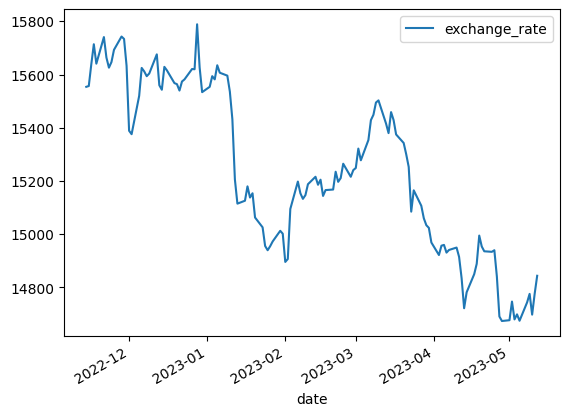

In [20]:
df.plot()

Now we have the visualisation from our scrapping project. Here, we can see that in Dec'22 until Jan'23, IDR exchange rate weakend towards USD. There are several factors on why this happened. For example, in Dec 14th '22, the Fed raised interest rates half  a point to the highest level in 15 years (https://www.cnbc.com/2022/12/14/fed-rate-decision-december-2022.html). It may resulting the decreasing value of IDR for that period. Or when USD value decreased significantly in Jan'23 because of China reopen borders for international travel. From this data, we can see that exchange rate is highly volatile and have many external factors. This data portrays how over short period, the value of IDR can increase or decrease signficantly. This information will be useful for business owner that have high exposure towards USD and international trade. Or for investors in general because our market still highly influenced by USD value. 